# Implementación de una red con Pytorch

La paqueteríía de PyTorch permite implementar arquitectura de redes neuronales de manera simple. Esta contiene varias funciones y estructuras predeterminadas que puede concatenarse para formar una red de mayor complejidad. 

Aquí implementamos una red a partir de las funciones de PyTorch, para poder ver cómo funcionan los módulos de Torch.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Los datos

Generaremos datos en numpy, pero para trabajar con pytorch requeriremos transformar estos arreglos en el formato de tensores de pytorch.

En primer lugar generamos los datos:

In [2]:
"""
Creación de los datos
"""
r0, r1, r2 = 1, 4, 6
k = 1000
X1 = [np.array([r0*np.cos(t),r0*np.sin(t)]) for t in range(0,k)]
X2 = [np.array([r1*np.cos(t),r1*np.sin(t)]) for t in range(0,k)]
X3 = [np.array([r2*np.cos(t),r2*np.sin(t)]) for t in range(0,k)]
X = np.concatenate((X1,X2,X3))
n,d = X.shape
Y = np.zeros(3*k)
Y[:k] += 1
Y[k:2*k] += 2
noise = np.array([np.random.normal(0,1,2) for i in range(n)])
X += 0.5*noise


Pytorch trabaja con tensores. Es decir, nuestros datos deben estar en una estructura correspondiente a los tensores que puede ller PyTorch. Esta paqueteríía probe las herramientas. En este caso utilizaremos dos tipos de codificación:

* torch.Tensor(): Es un tensor con elementos de un mismo tipo en que pueden hacerse operaciones tensoriales con flotantes.
* torch.LongTensor(): Es un tensor en donde los elementos son iterpretados como enteros. En general, algunas funciones de riesgo (pérdida) requieren que las clases objetivo estén en este formato.

<class 'torch.Tensor'> <class 'torch.Tensor'>


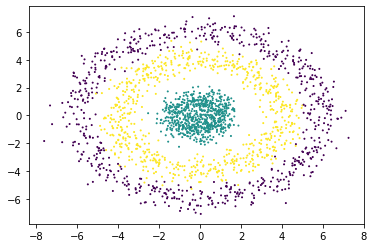

In [3]:
#Ejemplos formato: Tensor
X = torch.Tensor(X)
#Clases formato: LongTensor
Y = torch.LongTensor(Y)

print(type(X), type(Y))

#Seprara en train y en test
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

#Visualización de train set
plt.scatter(x_train[:,0], x_train[:,1],c=y_train,s=1)
plt.show()

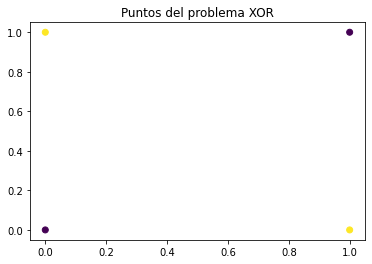

In [4]:
#Ejemplos formato: Tensor
X = torch.Tensor([[1,0],[0,1],[1,1],[0,0]])
#Clases formato: LongTensor
Y = torch.LongTensor([1,1,0,0])

#Visualización de los datos
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Puntos del problema XOR')
plt.show()

## La red neuronal

### Definir la arquitectura

Para poder aplicar la red necesitamos definir una arquitecturas: es decir, necesitamos definir el número de cpas, las dimensiones ocultas y las funciones de activación en cada capa.
En este caso utilizaremos 4 capas ocultas que definiremos con el siguiente número de unidades ocultas.

In [5]:
#Dimensión de entrada
d = 2
#Unidades primera capa
m1 = 100
#Unidades segunda capa
m2 = 150
#Unidades tercera capa
m3 = 100
#Unidades cuarta capa
m4 = 2
#Neuronas de salida (núm. de clases)
o = 3

Ahora definiremos la red, para esto ocuparemos la funcióón $nn.Sequential()$ (pero también se puede definir cada capa de forma independiente). Lo que hace esta función es indicar la secuencia en que se aplicarán las capas. Así mismo se elegirán el tipo de activación en cada capa. En la capa de salida es usual utilizar la activación Softmax. 

Algunos tipos de funciones de activacióón con las que pytorch cuenta son:

* nn.Sigmoid(): Función sigmoide $\sigma(a) = \frac{1}{1+e^{-a}}$
* nn.Tanh(): Función tangente hiperbóólica $tanh(a) = \frac{e^a-e^{-a}}{e^a + e^{-a}}$
* nn.Softmax(): Función Softmax $Softmax(a) = \frac{e^a}{\sum_c e^c}$ 
* nn.ReLU(): Función de regularización lineal $ReLU(a) = \max\{0, a\}$
* nn.Softplus(): Función Softplus $softplus(a) = \log(1 + e^a)$

In [6]:
#Definicióón de la arquitectura de la red
neural_network = nn.Sequential(nn.Linear(d, m1), nn.ReLU(), nn.Linear(m1,m2), nn.ReLU(), nn.Linear(m2,m3), 
                               nn.ReLU(), nn.Linear(m3, m4), nn.ReLU()) #nn.Linear(m4, o), nn.Softmax(dim=1))

#Se pueden separar las capas, o bien poner en un solo Sequential
out = nn.Sequential(nn.Linear(m4, o), nn.Softmax(dim=1))

#neural_network = nn.Sequential(nn.Linear(d, 3), nn.Tanh(), nn.Linear(3, o), nn.Softmax(dim=1))

### Entrenamiento de la red

El entrenamiento de la red con pytroch se realiza a partir de seleccionar funciones de pérdida y seleccionar el optimizador con el que trabajaremos. 

En primer lugar, definiremos los hiperparámetros (estos dependerán también del tipo de optimizador que utilicemos.

In [7]:
#Rango de aprendizaje
eta = 0.1
#Núm. máximo de iteraciones
max_it = 300

Ahora definiremos la función de riesgo. En este caso, utilizaremos la entropía cruzada (nn.CrossEntropyLoss()), pero se peuden definir otras funciones de riesgo (como el error cuadrático nn.MSELoss o la divergencia KL nn.KLDivLoss).

Asimismo, definiremos el optimizador, que es el gradiente descendiente estocástico. Aunque también cuenta con otras optimizadores (Adam, Adadelta, Adagrad, RMSProp).

In [8]:
#Función de riesgo a optimizar
risk = nn.CrossEntropyLoss()
#Optimizador, se indica qué parámetros se aprenderán y los hiperparámetros 
#del optimizador
optimizer = torch.optim.Adam(list(neural_network.parameters())+list(out.parameters()), lr=eta,eps=0.5, betas=(0.09, 0.09))

Una vez definido esto, podemos entrenar la red a partir de minimizar la función de riesgo con el método de backpropagation.

[]

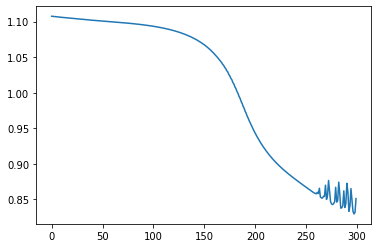

In [9]:
total_risk = []
#Itera por el número de épocas
for i in range(max_it):
  #Lleva los gradientes a 0
  optimizer.zero_grad()
  #Aplica la red con los parámetros actuales
  Y_hat = out(neural_network(x_train))
  #Evalua el riesgo con la red en el 
  #estado actual
  loss = risk(Y_hat, y_train)
  total_risk.append(loss)
  #Retropropaga el error
  loss.backward()
  optimizer.step()

plt.plot(total_risk)
plt.plot()

Finalmente, podemos evaluar la red en los datos o en datos nuevos para obtener una clasificación.

In [10]:
def forward(X):
  probs = out(neural_network(X))
  return torch.argmax(probs, axis=1)

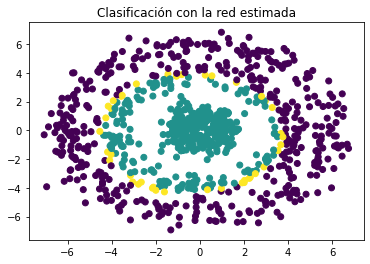

In [11]:
y_predict = forward(x_test)

plt.scatter(x_test[:,0], x_test[:,1], c=y_predict)
plt.title('Clasificación con la red estimada')
plt.show()

In [12]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       319
           1       0.66      1.00      0.79       284
           2       0.98      0.14      0.25       297

    accuracy                           0.72       900
   macro avg       0.79      0.71      0.63       900
weighted avg       0.80      0.72      0.64       900



### ¿Qué aprende la red?

Podemos explorar los datos de la red, por ejemplo, podemos observar qué transformación se realiza en la última capa oculta; es decir, antes de aplicar la capa de salida.

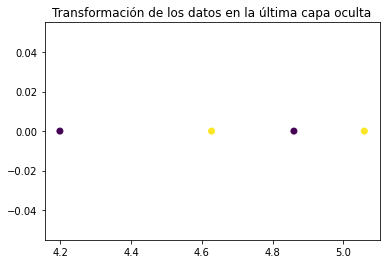

In [13]:
#Transformación de los datos
pre_out = neural_network(X).detach()

#Visualización de la transformación
plt.scatter(pre_out[:,0], pre_out[:,1], c=Y)
plt.title('Transformación de los datos en la última capa oculta')
plt.show()

También podemos visualizar la forma en que la red, en la capa de salida) clasifica los datos. Como hemos visto, la capa de salida toma la última capa oculta (donde los datos son linealmente separables) y define un hiperplano que permita clasificar los datos (o estimar sus probabilidades).

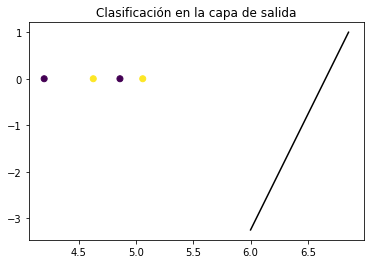

In [14]:
w,b = list(out.parameters())

#Puntos extremos de la recta
xs = [6, -b[0]/w[2,1]]
ys = [-b[0]/w[2,0], 1]

#Recta de decisión
plt.plot(xs,ys,'k-')
#Ploteo
plt.scatter(pre_out[:,0], pre_out[:,1], c=Y)
plt.title('Clasificación en la capa de salida')
plt.show()